### exploring Louis Abramson's SFHs 

In [1]:
import numpy as np 
import h5py

import env
import util as UT
import observables as Obv
from ChangTools.fitstables import mrdfits

    import matplotlib.pyplot as plt
    %matplotlib inline
    from ChangTools.plotting import prettyplot
    from ChangTools.plotting import prettycolors

read in SFHs

In [2]:
f = ''.join([UT.dat_dir(), 'labramson/', 'mikeGenBasic.fits'])
labram = mrdfits(f)

In [3]:
print labram.__dict__.keys()

['t_to_m_obs', 'tau', 't_to_m_final', 'sfr_t', 'mstel_final', 'redshift', 't0', 'sfr_obs', 'sfr_mod_snap', 'time', 'snap', 'mstel_t', 'mstel_obs', 'today']


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


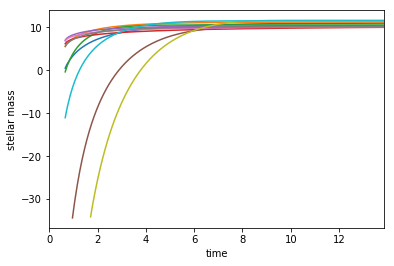

In [4]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in np.random.choice(np.arange(1000), 10):
    sub.plot(labram.time[0,:], np.log10(labram.mstel_t[0,i,:]))
sub.set_xlim([0., 13.86])
sub.set_xlabel('time')
sub.set_ylabel('stellar mass')

In [5]:
# index where redshift = z[snapshot = 15]
i_z15 = np.abs(labram.time[0] - UT.t_nsnap(15)).argmin()
print labram.time[0, i_z15], i_z15

i_z1 = np.abs(labram.time[0] - UT.t_nsnap(1)).argmin()
print labram.time[0, i_z1], i_z1

5.66337 100
13.1134 249


In [6]:
# Mstar and SFR at snapshots 1 and 15
LA_mstar_z15 = np.log10(labram.mstel_t[0,:,i_z15])
LA_sfr_z15 = np.log10(labram.sfr_t[0,:,i_z15]) - 9.0

LA_mstar_z1 = np.log10(labram.mstel_t[0,:,i_z1])
LA_sfr_z1 = np.log10(labram.sfr_t[0,:,i_z1]) - 9.0

Plot the $log\;SFR$ versus $log\;M_{*}$ relation

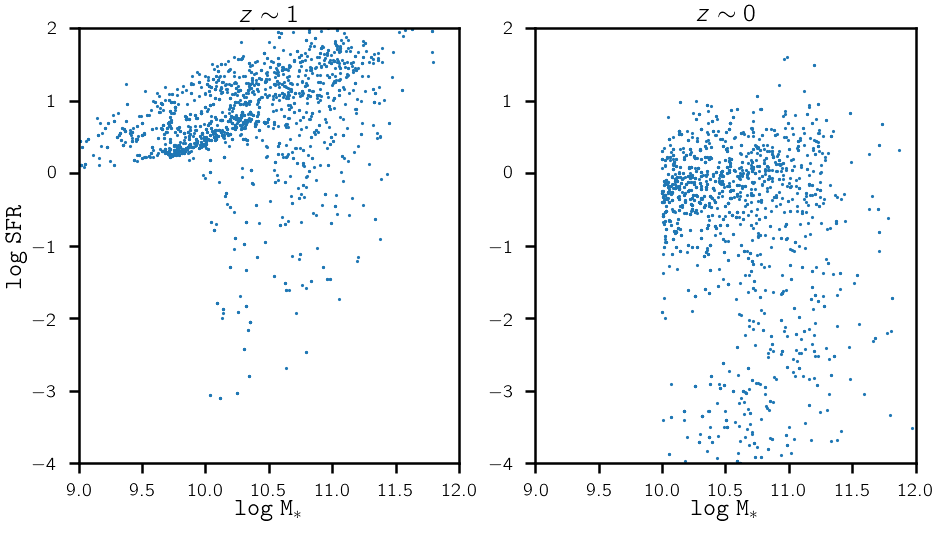

In [7]:
prettyplot()
fig = plt.figure(figsize=(15,8))
sub = fig.add_subplot(121)
sub.scatter(LA_mstar_z15, LA_sfr_z15, lw=0, s=10)
sub.set_xlim([9.0, 12.])
sub.set_xlabel('$\mathtt{log\;M_*}$', fontsize=25)
sub.set_ylim([-4., 2.])
sub.set_ylabel('$\mathtt{log\;SFR}$', fontsize=25)
sub.set_title('$z \sim 1$', fontsize=25)

sub = fig.add_subplot(122)
sub.scatter(LA_mstar_z1, LA_sfr_z1, lw=0, s=10)
sub.set_xlim([9.0, 12.])
sub.set_xlabel('$\mathtt{log\;M_*}$', fontsize=25)
sub.set_ylim([-4., 2.])
sub.set_title('$z \sim 0$', fontsize=25)

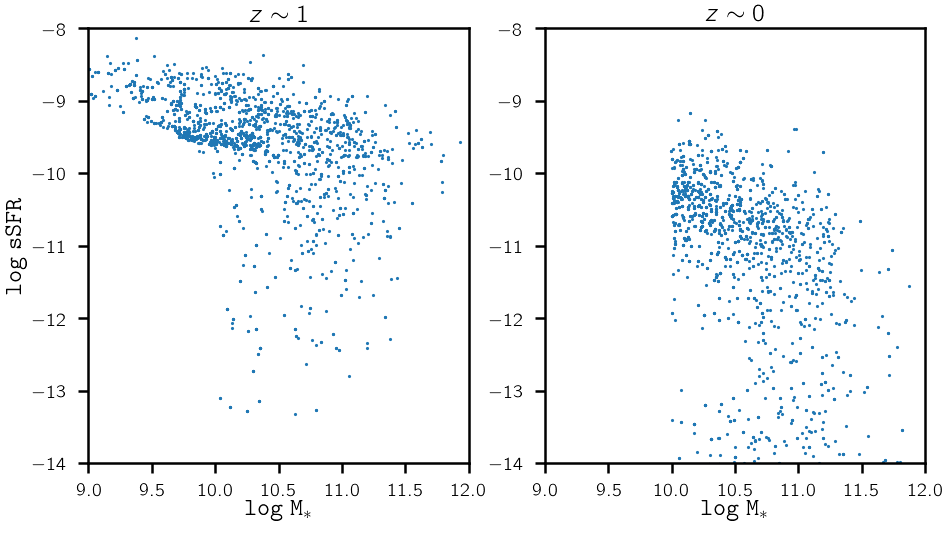

In [8]:
prettyplot()
fig = plt.figure(figsize=(15,8))
sub = fig.add_subplot(121)
sub.scatter(LA_mstar_z15, LA_sfr_z15 - LA_mstar_z15, lw=0, s=10)
sub.set_xlim([9.0, 12.])
sub.set_xlabel('$\mathtt{log\;M_*}$', fontsize=25)
sub.set_ylim([-14, -8])
sub.set_ylabel('$\mathtt{log\;sSFR}$', fontsize=25)
sub.set_title('$z \sim 1$', fontsize=25)

sub = fig.add_subplot(122)
sub.scatter(LA_mstar_z1, LA_sfr_z1 - LA_mstar_z1, lw=0, s=10)
sub.set_xlim([9.0, 12.])
sub.set_xlabel('$\mathtt{log\;M_*}$', fontsize=25)
sub.set_ylim([-14., -8])
sub.set_title('$z \sim 0$', fontsize=25)

weight the galaxies so that it reproduces the $z \sim 0$ SMF 

In [9]:
mbin = np.arange(10., 12.2, 0.1)
ngal_z1, bbb = np.histogram(LA_mstar_z1, bins=mbin)
# Li White + Marchesini SMF
phi_z1 = Obv.analyticSMF(UT.z_nsnap(1), m_arr=mbin[:-1], dlogm=mbin[1]-mbin[0], source='li-march')

w_mbin = np.array([phi_z1[1][i]/float(ngal_z1[i]) for i in range(len(ngal_z1))])
weight_z1 = np.zeros(len(LA_mstar_z1))
for im in range(len(mbin)-1): 
    inmbin = np.where((LA_mstar_z1 >= mbin[im]) & (LA_mstar_z1 < mbin[im+1]))
    weight_z1[inmbin] = w_mbin[im]

In [10]:
phi_z15 = Obv.analyticSMF(UT.z_nsnap(15), m_arr=mbin[:-1], dlogm=mbin[1]-mbin[0], source='li-march')

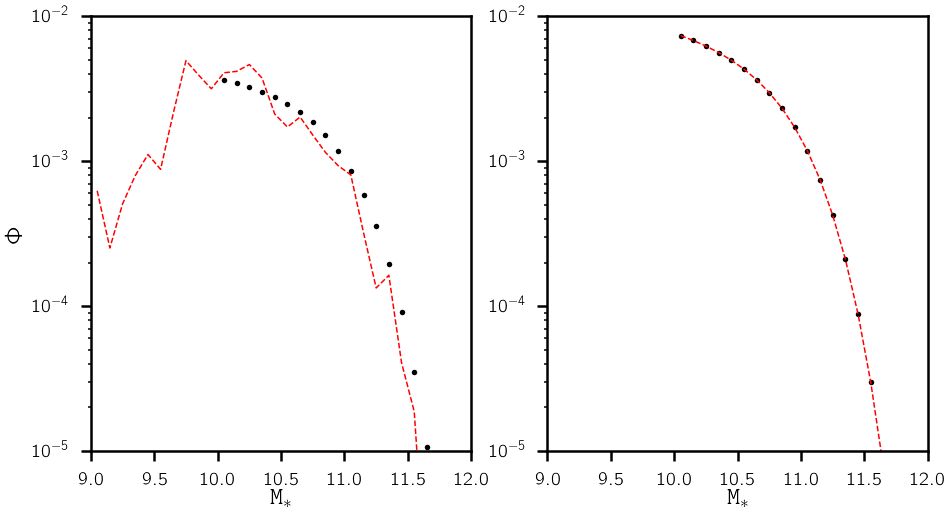

In [11]:
fig = plt.figure(figsize=(15,8))
sub = fig.add_subplot(121)
sub.scatter(phi_z15[0], phi_z15[1], lw=0, c='k', s=30)
wgal_z15, bbb = np.histogram(LA_mstar_z15, weights=weight_z1, bins=np.arange(9.0, 12.2, 0.1))
sub.plot(0.5*(bbb[:-1]+bbb[1:]), wgal_z15, ls='--', c='r')
sub.set_xlim([9., 12.])
sub.set_xlabel('$\mathtt{M_*}$', fontsize=25)
sub.set_ylim([1e-5, 1e-2])
sub.set_ylabel('$\Phi$', fontsize=25)
sub.set_yscale("log")

sub = fig.add_subplot(122)
sub.scatter(phi_z1[0], phi_z1[1], lw=0, c='k', s=30)
wgal_z1, bbb = np.histogram(LA_mstar_z1, weights=weight_z1, bins=mbin)
sub.plot(0.5*(bbb[:-1]+bbb[1:]), wgal_z1, ls='--', c='r')
sub.set_xlim([9., 12.])
sub.set_xlabel('$\mathtt{M_*}$', fontsize=25)
sub.set_ylim([1e-5, 1e-2])
sub.set_yscale("log")

Now we need to assign halos to the galaxies...

In [12]:
f_halo = h5py.File(UT.dat_dir()+'SubhaloHistory.sigma_SMHM0.2.smf_li-march.Anc_nsnap15.hdf5', 'r')
halo = f_halo['data']

Go through stellar mass bins and assign $M_{halo}(z\sim 1)$ and $M_{halo}(z\sim 0)$

In [13]:
SHAM_mhalos_z15 = halo['snapshot15_halo.m']
SHAM_msham_z15 = halo['snapshot15_m.star']
SHAM_mhalos_z1 = halo['halo.m']
SHAM_msham_z1 = halo['m.star']

In [14]:
print SHAM_msham_z15[:10]

[-999.           10.4545393     0.         -999.            0.            0.
    0.           10.43734264 -999.            0.        ]


In [15]:
# now lets assign halo mass to Louis's galaxies in some sensible way at z~1
dlogm = 0.2
index_assign = np.repeat(-999, len(LA_mstar_z15))
for mlow in np.arange(9., 12., dlogm): 
    sham_mbin = np.where((SHAM_msham_z15 >= mlow) & (SHAM_msham_z15 < mlow+dlogm))
    labm_mbin = np.where((LA_mstar_z15 >= mlow) & (LA_mstar_z15 < mlow+dlogm))
    if len(sham_mbin[0]) > 0 and len(labm_mbin[0]) > 0: 
        index_assign[labm_mbin] = np.random.choice(sham_mbin[0], size=len(labm_mbin[0]), replace=False)

In [16]:
withmatch = np.where(index_assign != -999)

(9.0, 12.0)

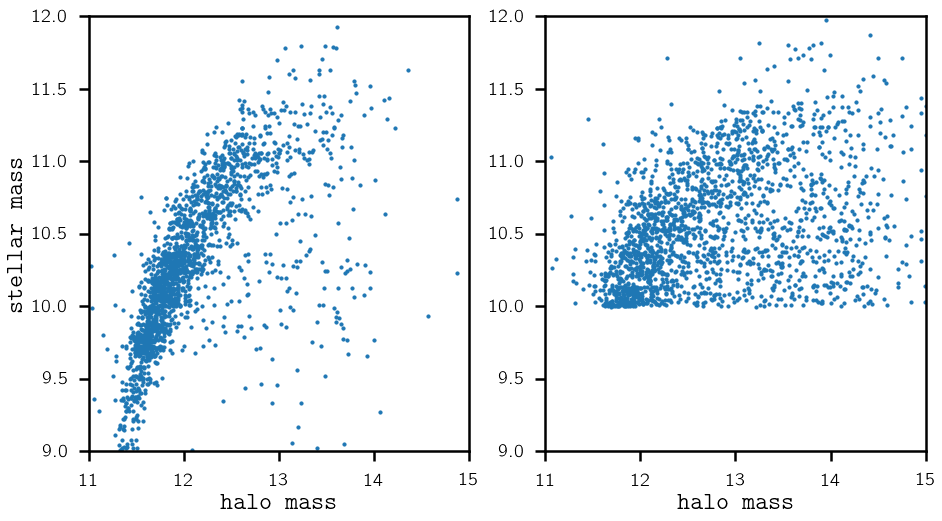

In [17]:
fig = plt.figure(figsize=(15,8))
sub = fig.add_subplot(121)
sub.scatter([SHAM_mhalos_z15[i] for i in index_assign[withmatch]], LA_mstar_z15[withmatch], s=10)
    sub.set_xlim([11., 15.])
    sub.set_xlabel('halo mass', fontsize=25)
    sub.set_ylim([9., 12.])
    sub.set_ylabel('stellar mass', fontsize=25)
sub = fig.add_subplot(122)
sub.scatter([SHAM_mhalos_z1[i] for i in index_assign[withmatch]], LA_mstar_z1[withmatch], s=10)
sub.set_xlim([11., 15.])
sub.set_xlabel('halo mass', fontsize=25)
sub.set_ylim([9., 12.])

In [27]:
sham_mh_z15_wm = np.array([SHAM_mhalos_z15[i] for i in index_assign[withmatch]])
sham_mh_z1_wm = np.array([SHAM_mhalos_z1[i] for i in index_assign[withmatch]])
la_ms_z15_wm = LA_mstar_z15[withmatch]
la_ms_z1_wm = LA_mstar_z1[withmatch]

sigmstar_z15 = []
sigmstar_z1 = []
m_mid_z15, m_mid_z1 = [], []
for mlow in np.arange(12., 15., 0.5): 
    m_bin_z15 = np.where((la_ms_z15_wm >= mlow) & (la_ms_z15_wm < mlow+dlogm))    
    if np.sum(weight_z1[withmatch[0][m_bin_z15]]) > 0: 
        m_mid_z15.append(mlow+0.5*dlogm)
        avg = sham_mh_z15_wm[m_bin_z15] * weight_z1[withmatch[0][m_bin_z15]] / np.sum(weight_z1[withmatch[0][m_bin_z15]])
        var = np.average((sham_mh_z15_wm[m_bin_z15]-avg)**2, weights=weight_z1[withmatch[0][m_bin_z15]])
        sigmstar_z15.append(np.sqrt(var))
    
    m_bin_z1 = np.where((la_ms_z1_wm >= mlow) & (la_ms_z1_wm < mlow+dlogm))
    if np.sum(weight_z1[withmatch[0][m_bin_z1]]) > 0: 
        m_mid_z1.append(mlow+0.5*dlogm)
        avg = sham_mh_z1_wm[m_bin_z1] * weight_z1[withmatch[0][m_bin_z1]] / np.sum(weight_z1[withmatch[0][m_bin_z1]])
        var = np.average((sham_mh_z1_wm[m_bin_z1]-avg)**2, weights=weight_z1[withmatch[0][m_bin_z1]])
        sigmstar_z1.append(np.sqrt(var))

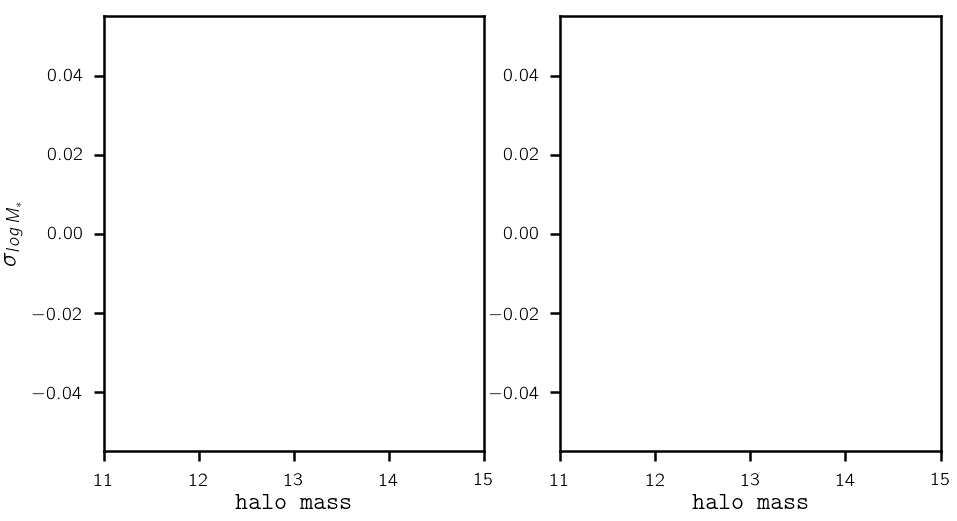

In [28]:
fig = plt.figure(figsize=(15,8))
sub = fig.add_subplot(121)
sub.plot(m_mid_z15, sigmstar_z15)
sub.set_xlim([11., 15.])
sub.set_xlabel('halo mass', fontsize=25)
#sub.set_ylim([9., 12.])
sub.set_ylabel('$\sigma_{log\,M_*}$', fontsize=25)
sub = fig.add_subplot(122)
sub.plot(m_mid_z1, sigmstar_z1)
sub.set_xlim([11., 15.])
sub.set_xlabel('halo mass', fontsize=25)